# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import ParenthesizationDataset, ParenthesizationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Initialization
Set the parameters here for training and initialize the train/test datasets, data loaders, model, loss function and optimizer.

In [2]:
n = 7
epochs = 50
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 32

# TODO: Create the datasets, model, loss function, optimizer, and data loader. 
model = ParenthesizationModel(n)
train_dataset = ParenthesizationDataset(n)
test_dataset = ParenthesizationDataset(n)
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True) 
test_dataloader = DataLoader(test_dataset, batch_size, shuffle=False)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)






# Training the model
* Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
* Print out the epoch number and loss after each training call to verify that the loss is going down.
* Record the loss values in a list so that it can be plotted in the cell below.
* After training, call `evaluate_model` to get the confusion matrix.
* Save the model as `models/linear_model_{n}.pt`.

In [3]:
losses = []
for epoch in range(epochs):
    # TODO
    loss = train_one_epoch(train_dataloader, model, loss_fn, optimizer)
    print("Epoch: ", epoch, " Loss: ", loss)
    losses.append(loss)
print(losses)
evaluate_model(model, test_dataset)
if not os.path.exists("models"):
    os.mkdir("models")
torch.save(model.state_dict(), "models/linear_model_7.pt")





  batch 27 loss: 0.017971296906471253
Epoch:  0  Loss:  0.017971296906471253
  batch 27 loss: 0.016779600620269775
Epoch:  1  Loss:  0.016779600620269775
  batch 27 loss: 0.01581892830133438
Epoch:  2  Loss:  0.01581892830133438
  batch 27 loss: 0.015010293841362
Epoch:  3  Loss:  0.015010293841362
  batch 27 loss: 0.01429204946756363
Epoch:  4  Loss:  0.01429204946756363
  batch 27 loss: 0.013701409131288528
Epoch:  5  Loss:  0.013701409131288528
  batch 27 loss: 0.013169101566076279
Epoch:  6  Loss:  0.013169101566076279
  batch 27 loss: 0.012717493861913681
Epoch:  7  Loss:  0.012717493861913681
  batch 27 loss: 0.01231411001086235
Epoch:  8  Loss:  0.01231411001086235
  batch 27 loss: 0.011955810546875
Epoch:  9  Loss:  0.011955810546875
  batch 27 loss: 0.01165015235543251
Epoch:  10  Loss:  0.01165015235543251
  batch 27 loss: 0.011351397067308425
Epoch:  11  Loss:  0.011351397067308425
  batch 27 loss: 0.011091988384723663
Epoch:  12  Loss:  0.011091988384723663
  batch 27 loss:

/Users/Assaf/Math-480/6_25_2024_parenthesization_pytorch/train.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = torch.nn.functional.softmax(outputs)


# Plot the loss curve
Plot the loss curve with appropriate figure title and axis labels. Save the resulting figure in `figures/loss_curve_{n}.png`.

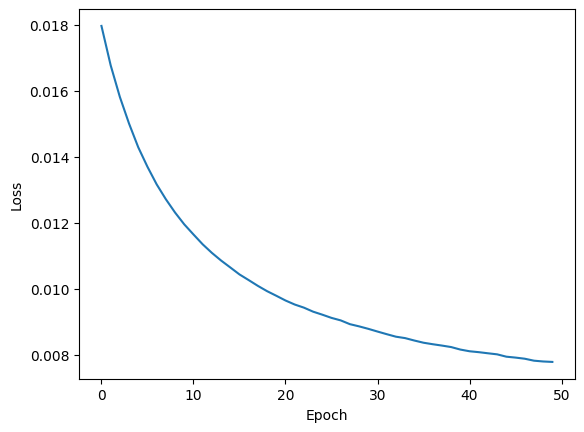

In [4]:
if not os.path.exists("figures"):
    os.mkdir("figures")
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("figures/loss_curve_7.png")

# Analyze accuracy using the confusion matrix
- Print out the accuracy within each of the prediction classes.
- Print out the size of each prediction class.
- Print out the overall accuracy.

In [5]:
confusion_matrix = evaluate_model(model, test_dataset)
print("Positive accuracy: %", 100 * confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]))
print("Negative accuracy: %", 100 * confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1]))
print("Size true positive: ", confusion_matrix[0][0])
print("Size true negative: ", confusion_matrix[1][1])
print("Size false positive: ", confusion_matrix[0][1])
print("Size false negative: ", confusion_matrix[1][0])
print("Overall accuracy: %" , 100 * (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0]))


Positive accuracy: % 84.14918414918415
Negative accuracy: % 100.0
Size true positive:  361
Size true negative:  429
Size false positive:  68
Size false negative:  0
Overall accuracy: % 92.07459207459208


# Plot the model weights
Can you interpret what the model is doing? Plot the model weights using `plt.imshow()` to get a heatmap. Choose a colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html that you prefer. I default to the `bwr` colormap where negative values are blue, positive value are red, and values close to zero are white.

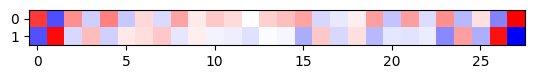

In [6]:
plt.imshow(model.fc.weight.detach().numpy(), cmap="bwr")


# "Translate" the model into code.
Implement `simple_evaluate` which condenses the model's "logic" into a single if-else statement. Run this evaluation function over the test set to produce a new confusion matrix and see how it performs compared to the model you train.

In [7]:
# Try to condense the linear model down into a single if-else statement. 
def simple_evaluate(input):
    if input[0] == 1.0 or input[-1] == 1.0:
        return 0
    else:
        return 1
    
confusion_matrix = [[0, 0], [0, 0]]
for data in test_dataset:
    inputs, labels = data
    prediction = simple_evaluate(inputs)
    confusion_matrix[labels][prediction] += 1

print("Positive accuracy: %", 100 * confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1]))
print("Negative accuracy: %", 100 * confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1]))
print("Size true positive: ", confusion_matrix[0][0])
print("Size true negative: ", confusion_matrix[1][1])
print("Size false positive: ", confusion_matrix[0][1])
print("Size false negative: ", confusion_matrix[1][0])
print("Overall accuracy: %" , 100 * (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0]))

 




    

Positive accuracy: % 78.78787878787878
Negative accuracy: % 100.0
Size true positive:  338
Size true negative:  429
Size false positive:  91
Size false negative:  0
Overall accuracy: % 89.39393939393939
